! Disclaimer. This code is part of chapter and exercises from the Hands On ML book. Code doesn't belong to me. 
Original notebook you can find [here](https://github.com/ageron/handson-ml/blob/master/04_training_linear_models.ipynb)

## Setup

In [4]:
import sklearn
import numpy as np
import pandas as pd
import os
import warnings

np.random.seed(42) #making sure the nb will output stable across runs

import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

## Linear Regression

### The Normal Equation

One of the common metrics of evaluation of Linear Regression is Root Mean Square Error. In order to use RMSE we need to find the value of teta, which is a part of the equation - minimizes the cost function.

To test the equation we'll generate linear-looking data by using numpy. 

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

And that's how our randomly generated data looks like. 

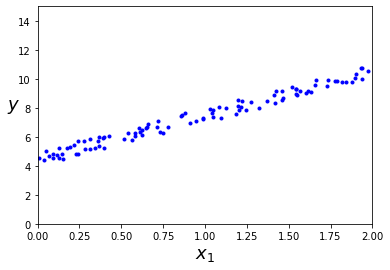

In [5]:
plt.plot(X,y, 'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.show()

We'll compute the teta using Normal Equation. In order to do it we will use NumPy's linear algebra module and the function inv() - it will compute the inverse of a matrix - and the dot() method - for matrix multiplication.

In [7]:
X_b = np.c_[np.ones((100,1)), X] # adds x) = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

To generate the data we used function y=4+3x, + Gaussian noise (, is used as substitue of 1 in lower index here)

In [8]:
theta_best

array([[4.51359766],
       [2.98323418]])

As we noise made it impossible to recover exact parameters of the original function. 

Let's make predictions using teta.

In [9]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new] #adding x0 =1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.51359766],
       [10.48006601]])

And let's plot the predictions. 

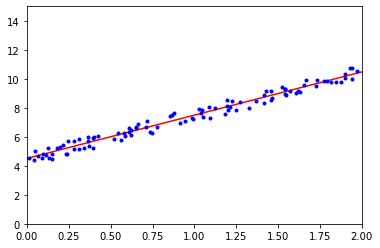

In [10]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X,y, 'b.')
plt.axis([0,2,0,15])
plt.show()

Linear Regression with scikit learn is much more straightforward...

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.51359766]), array([[2.98323418]]))

In [13]:
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])

Linear Regression is basec on scipy.linalg.lstq() function (least square). And we can call it directly with

In [15]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.51359766],
       [2.98323418]])

Above function is computing theta = X^+y, where X^+ is the psuedoinverse of X. We can compute the pseudoinverse like this:

In [16]:
np.linalg.pinv(X_b).dot(y)

array([[4.51359766],
       [2.98323418]])

Method of performing Linear Regression is important from the time and computational costs perspective. It can be especially a thing to take into consideration win datasets with a lot features. Both SVD and Normal Equation can be very slow then. On the other hand, they will handle training sets efficiently, if they can fit in memory.


---

While the Linear Regression model is trained, predictions are very fast.

---

Next on our list of Linear Models is Gradient descent, which will be better for cases when there are large number of features or too many inatnces to fit in memory.